In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_csv("mergeddata_17&18.csv")

In [3]:
data.head()

,ABS_MARGIN_MAX,ABS_MARGIN_AVG,ABS_MARGIN_SUM,geo,country,SUBGROUP
0,6572729,125362,58947687,AP,IN,XLARGE
1,3934183,44128,18886274,AP,KR,XLARGE
2,777781,28931,9419587,AP,TW,LARGE
3,648627,17106,4235393,AP,HK,LARGE
4,737064,65372,6994830,AP,ID,LARGE


In [4]:
data.shape

(70, 6)

In [5]:
data.dtypes

ABS_MARGIN_MAX     int64
ABS_MARGIN_AVG     int64
ABS_MARGIN_SUM     int64
geo               object
country           object
SUBGROUP          object
dtype: object

In [6]:
x = data.drop(['SUBGROUP','geo','country','ABS_MARGIN_SUM','ABS_MARGIN_AVG'],axis = 1).values

In [7]:
x = scale(x)

C:\Users\PranaviPadegal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
 

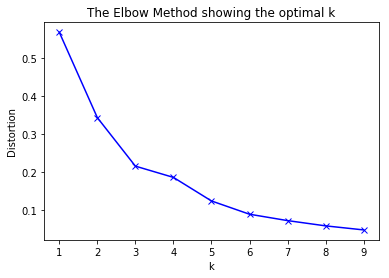

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
Y = np.array(data.SUBGROUP)

In [8]:
clustering = KMeans(n_clusters = 5,random_state= 1)

In [9]:
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [10]:
idx = np.argsort(clustering.cluster_centers_.sum(axis=1))
#lut = np.zeros_like(idx)
#lut[idx] = np.arange(5)

In [11]:
clustering.cluster_centers_.sum(axis=1)

array([-4.90909829e-01,  3.09533781e+00,  1.80968450e-03,  5.17419034e+00,
        8.30549396e-01])

In [12]:
idx

array([0, 2, 4, 1, 3], dtype=int64)

In [14]:
clustering.labels_

array([3, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 4, 2, 0, 4,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 4, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0])

In [15]:
y = pd.DataFrame(clustering.labels_)

In [16]:
y.columns = ['Predicted(SUM)']

In [17]:
data['Predicted(SUM)'] = y['Predicted(SUM)']

In [18]:
Y

array(['XLARGE', 'XLARGE', 'LARGE', 'LARGE', 'LARGE', 'LARGE', 'MEDIUM',
       'LARGE', 'SMALL', 'MEDIUM', 'SMALL', 'MEDIUM', 'SMALL', 'SMALL',
       'XLARGE', 'LARGE', 'LARGE', 'MEDIUM', 'MEDIUM', 'LARGE', 'MEDIUM',
       'SMALL', 'MEDIUM', 'MEDIUM', 'XSMALL', 'SMALL', 'SMALL', 'LARGE',
       'XSMALL', 'XSMALL', 'XSMALL', 'XSMALL', 'XLARGE', 'LARGE', 'LARGE',
       'LARGE', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'SMALL', 'XLARGE', 'MEDIUM',
       'MEDIUM', 'XLARGE', 'LARGE', 'MEDIUM', 'SMALL', 'MEDIUM', 'SMALL',
       'MEDIUM', 'XSMALL', 'SMALL', 'XSMALL', 'XSMALL', 'SMALL', 'XLARGE',
       'MEDIUM', 'XLARGE', 'MEDIUM', 'XLARGE', 'MEDIUM', 'LARGE', 'LARGE',
       'LARGE', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'SMALL', 'SMALL'],
      dtype=object)

In [19]:
data.to_csv("SUBGROUP(2017 and 2018).csv")